<img src="Big5.png" alt="drawing" width="500"/>

https://www.kaggle.com/datasets/tunguz/big-five-personality-test

## Questions and Column Key

In [2]:
import pandas as pd


codebook = './codebook.txt'
questions = pd.read_csv(codebook, skiprows=7, skipfooter=13, delimiter='\t', engine='python', header=None)
questions.columns = ['Statement_Number', 'Statement']
questions.head(15)


,Statement_Number,Statement
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.
5,EXT6,I have little to say.
6,EXT7,I talk to a lot of different people at parties.
7,EXT8,I don't like to draw attention to myself.
8,EXT9,I don't mind being the center of attention.
9,EXT10,I am quiet around strangers.


In [3]:
import re

with open(codebook, 'r') as file:
    lines = file.readlines()[60:]

column_names = []
descriptions = []

# Process each line to split into the variable name and description
for line in lines:
    # Use regex to split on the first sequence of multiple spaces
    match = re.split(r'\s{2,}|\s(?=\S)', line.strip(), maxsplit=1)
    if len(match) == 2:
        column_names.append(match[0])
        descriptions.append(match[1])
    else:
        # If there's no description, just add an empty string
        column_names.append(match[0])
        descriptions.append('')

# Create the DataFrame
key = pd.DataFrame({'Column_Name': column_names, 'Description': descriptions})
key

,Column_Name,Description
0,dateload,The timestamp when the survey was started.
1,screenw,The width the of user's screen in pixels
2,screenh,The height of the user's screen in pixels
3,introelapse,The time in seconds spent on the landing / int...
4,testelapse,The time in seconds spent on the page with the...
5,endelapse,The time in seconds spent on the finalization ...
6,IPC,The number of records from the user's IP addre...
7,country,"The country, determined by technical informati..."
8,lat_appx_lots_of_err,approximate latitude of user. determined by te...
9,long_appx_lots_of_err,approximate longitude of user


## Big 5 Test Results

The test questions are split into 5 categories with 10 questions split related to each of the 5 factors:
- EXT: Extroversion (outgoing/energetic vs. solitary/reserved)
- EST: Emotional Stability or Neuroticism (sensitive/nervous vs. secure/confident)
- AGR: Agreeableness (friendly/compassionate vs. challenging/detached)
- CSN: Conscientiousness (efficient/organized vs. easy-going/careless)
- OPN : Openness to experience (inventive/curious vs. consistent/cautious)

In [4]:
results = pd.read_csv("/Users/clayolsen1/ML_folder/BigFivePersonality/data-final.csv", delimiter='\t')
results.head(10)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,2016-03-03 02:03:12,1600.0,1000.0,4.0,196.0,3,1,SE,59.3333,18.05
6,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,4.0,3.0,...,2016-03-03 02:05:00,360.0,640.0,36.0,179.0,10,1,US,30.3322,-81.6556
7,3.0,1.0,5.0,2.0,5.0,2.0,5.0,2.0,3.0,2.0,...,2016-03-03 02:05:08,1440.0,900.0,15.0,210.0,17,1,MY,2.9927,101.7909
8,2.0,2.0,3.0,3.0,4.0,2.0,2.0,2.0,4.0,4.0,...,2016-03-03 02:05:27,2560.0,1440.0,2.0,181.0,4,1,GB,53.423,-2.2166
9,1.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,5.0,4.0,...,2016-03-03 02:08:06,1600.0,900.0,6.0,261.0,13,1,FI,60.1708,24.9375


## EDA

In [5]:
import matplotlib.pyplot as plt
def questionPlots(data, questionType, color):
    typeData = data.filter(regex= f'{questionType}(?!.*_E$)').loc[~(data == 0).any(axis=1)] # ignore the _E columns and specify by prefix like EST or  EXT and remove 0 values as it is not an option on the test
    plt.figure(figsize=(40,60))
    for i in range(1, len(typeData.columns)+1):
        plt.subplot(10,5,i)
        plt.hist(typeData[typeData.columns[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[questions['Statement_Number'] == typeData.columns[i-1]]['Statement'].values[0], fontsize=18)

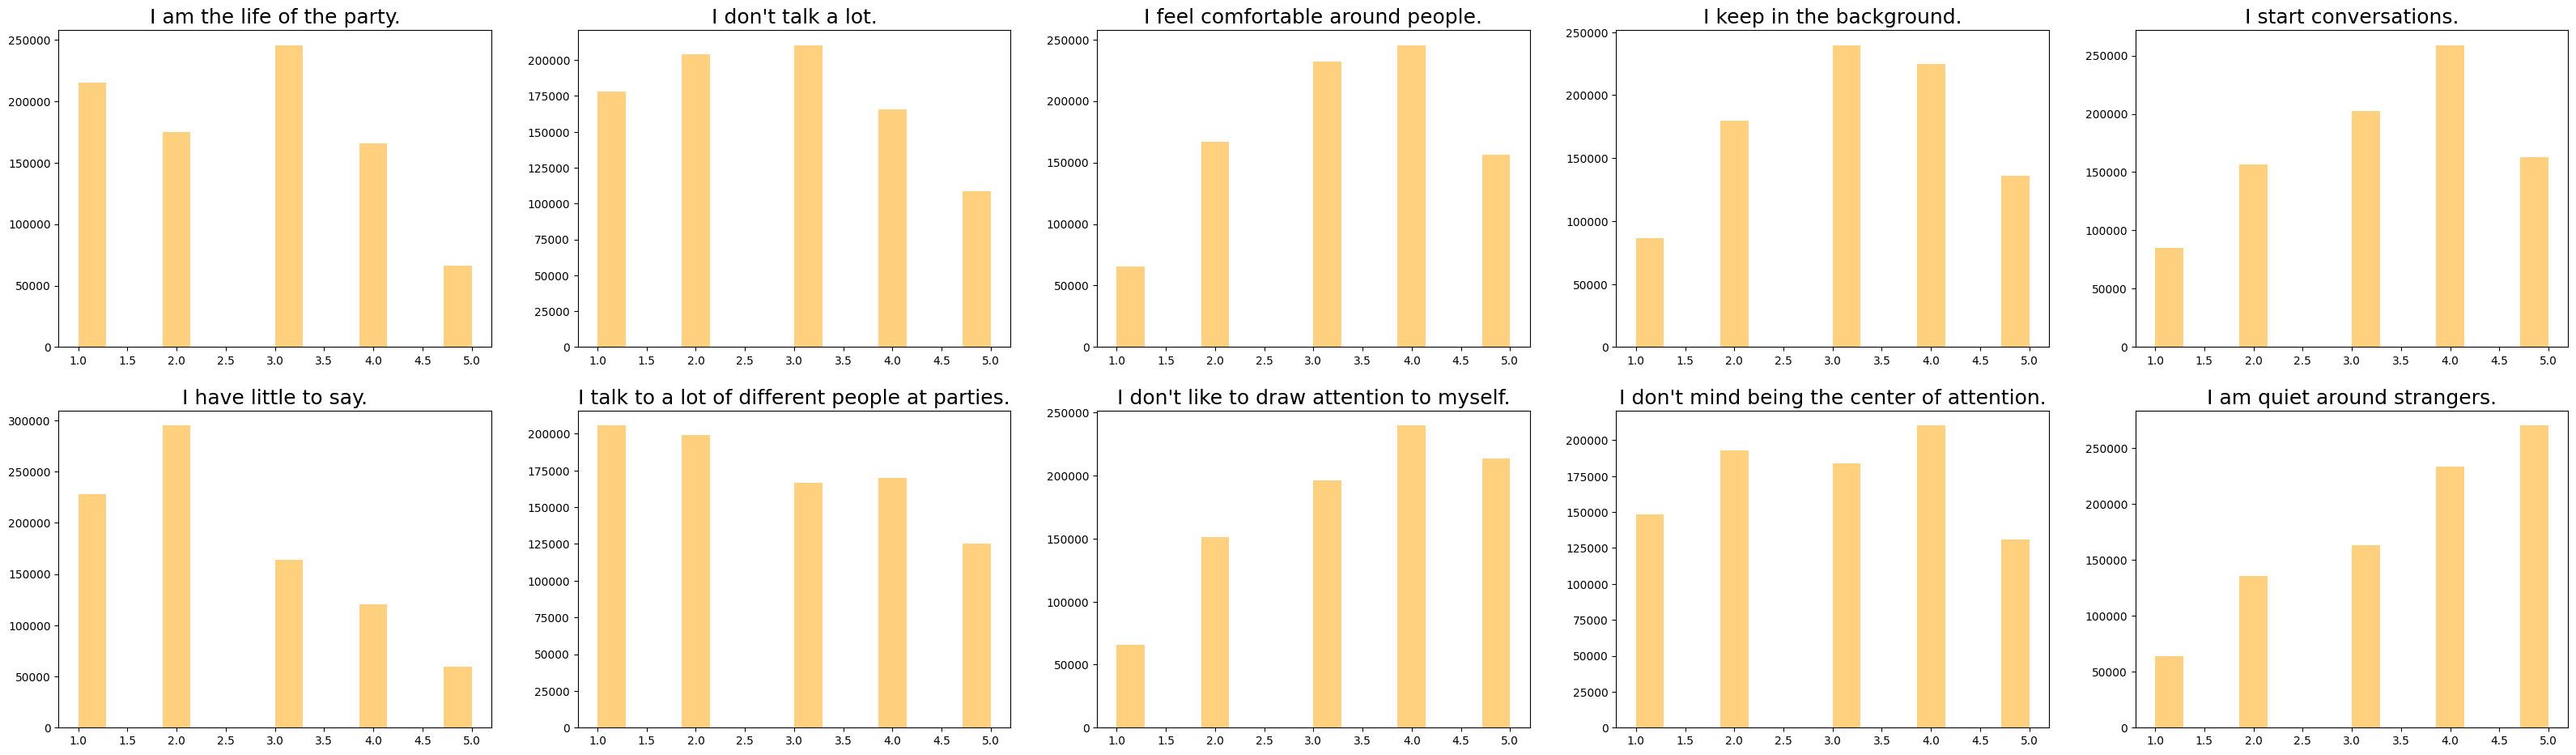

In [6]:
questionPlots(results.dropna(how='any', axis=0), 'EXT', 'orange')

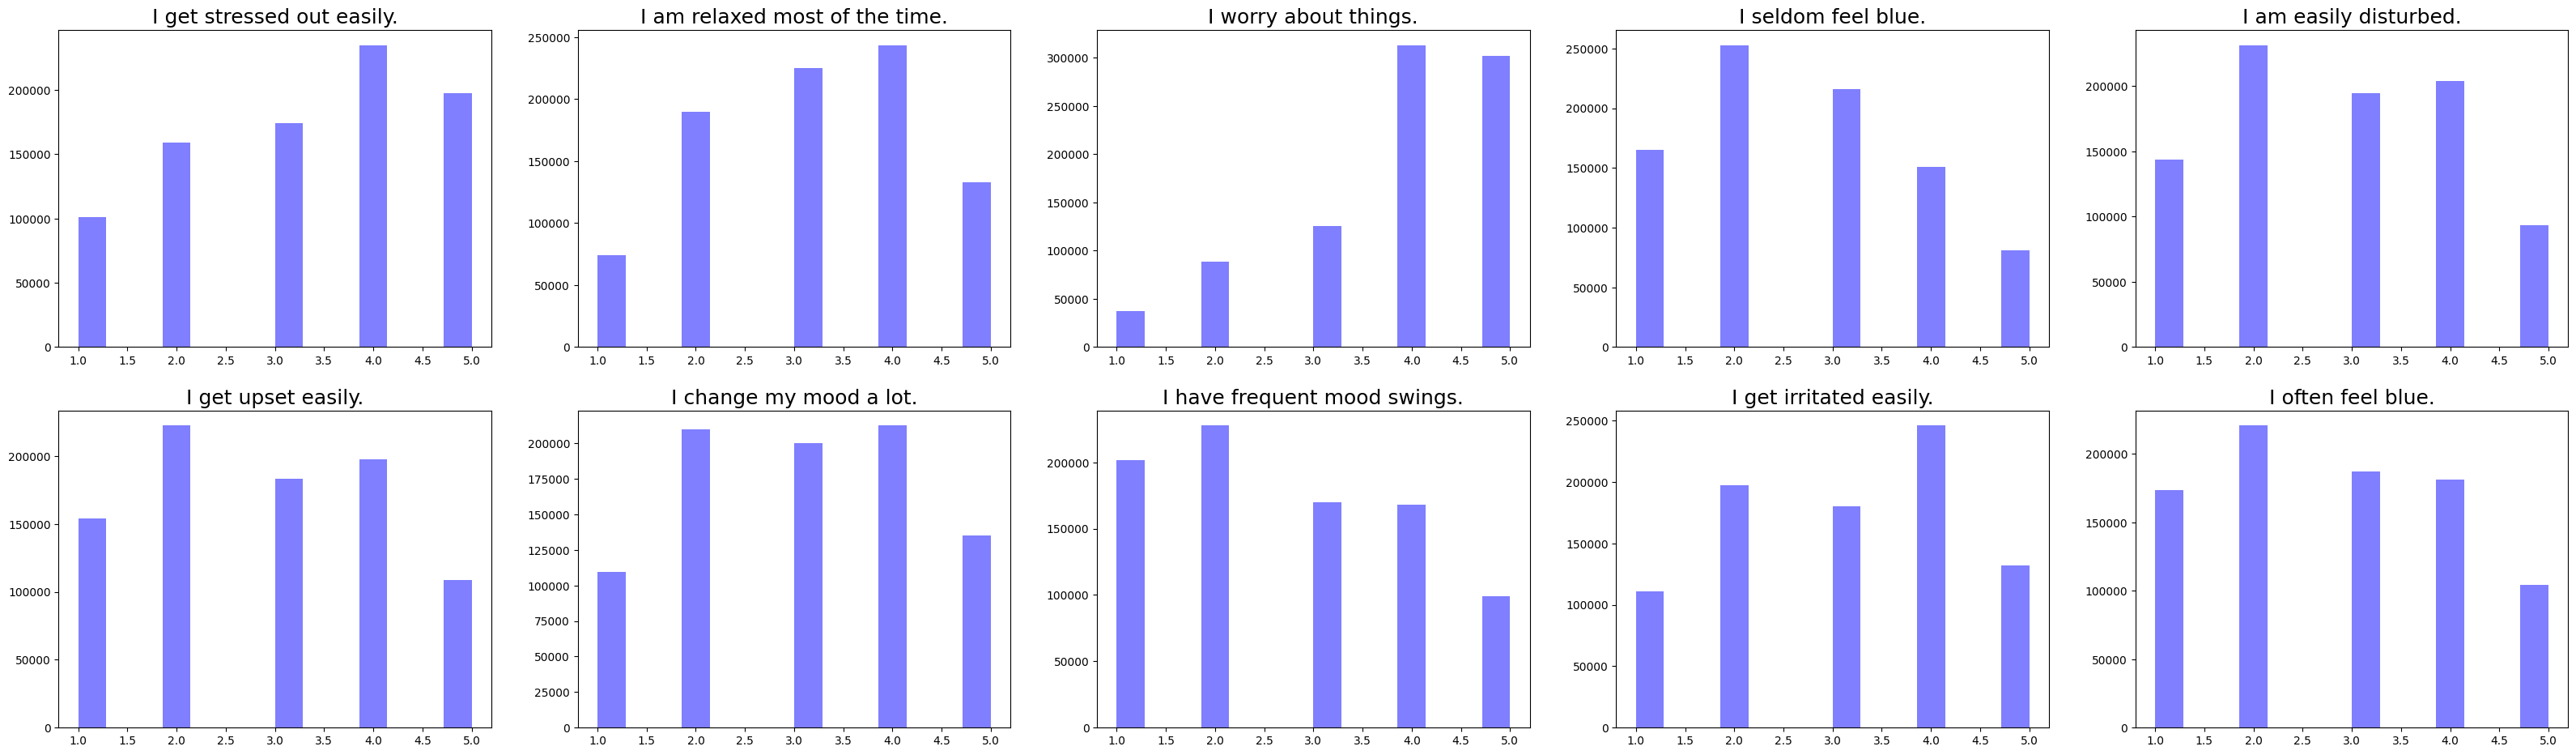

In [7]:
questionPlots(results.dropna(how='any', axis=0), 'EST', 'blue')

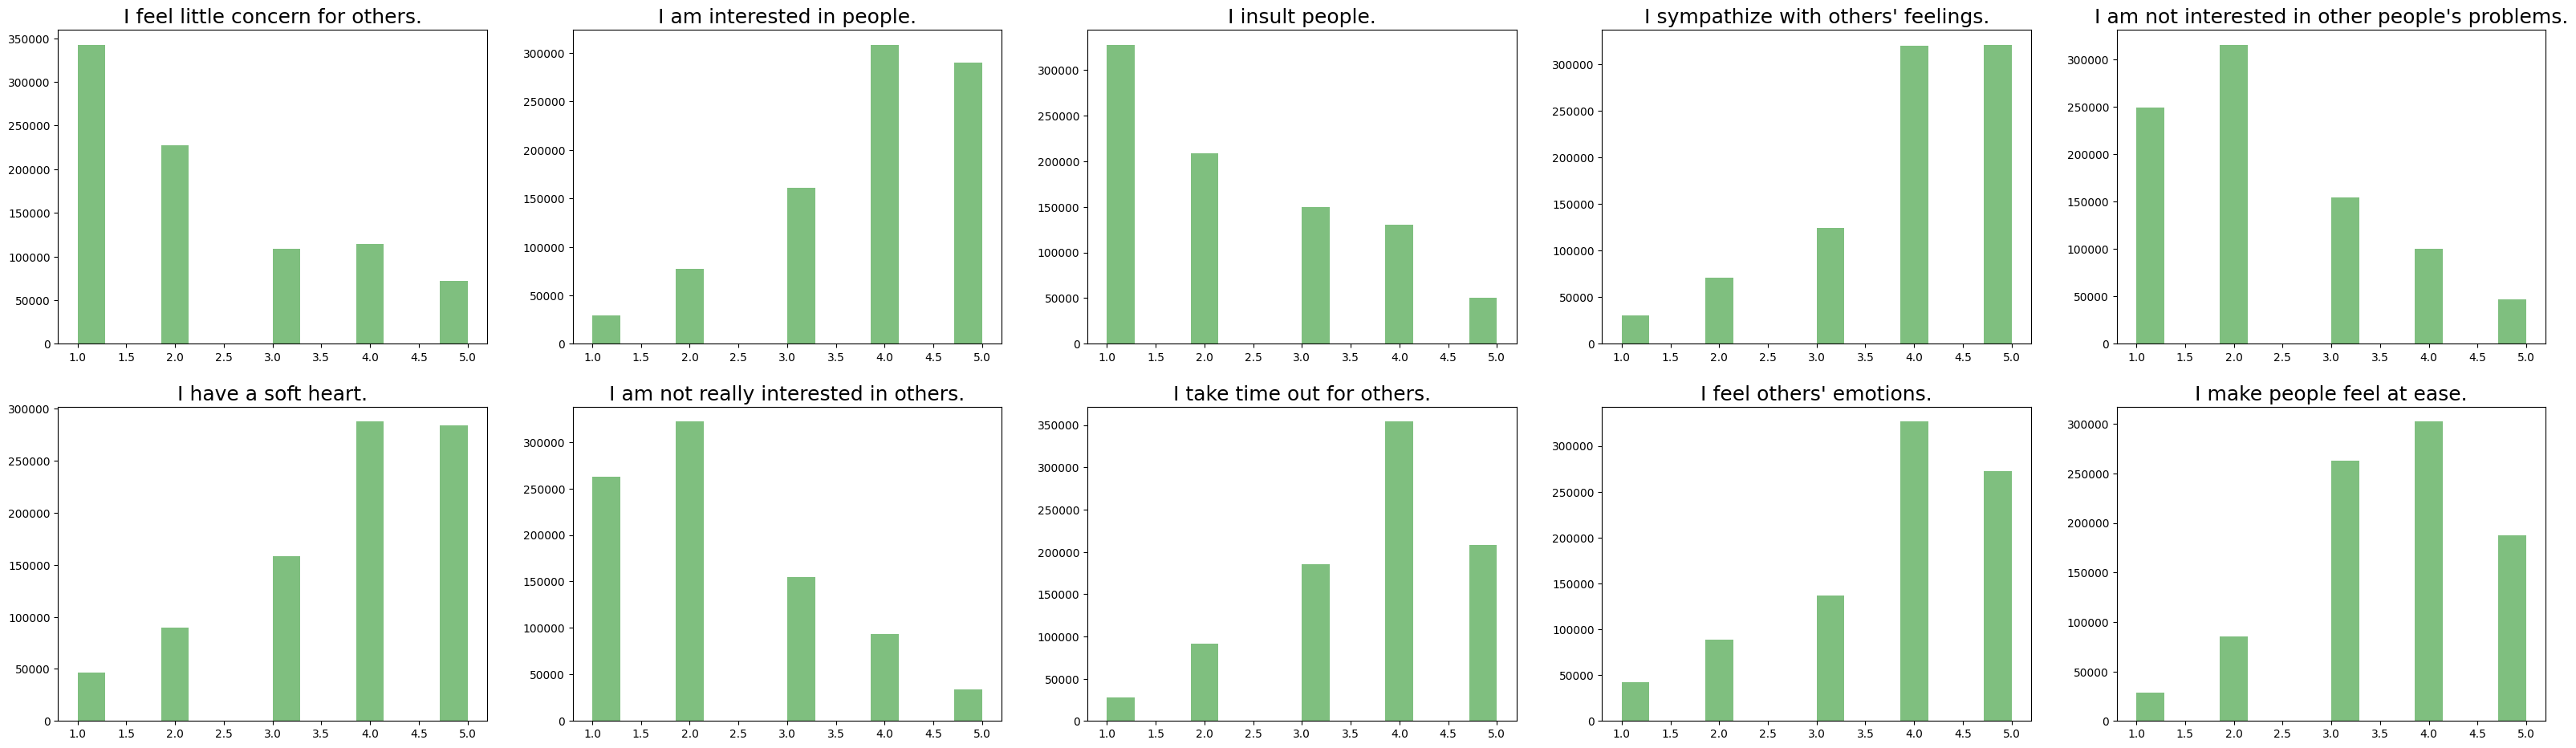

In [8]:
questionPlots(results.dropna(how='any', axis=0), 'AGR', 'green')

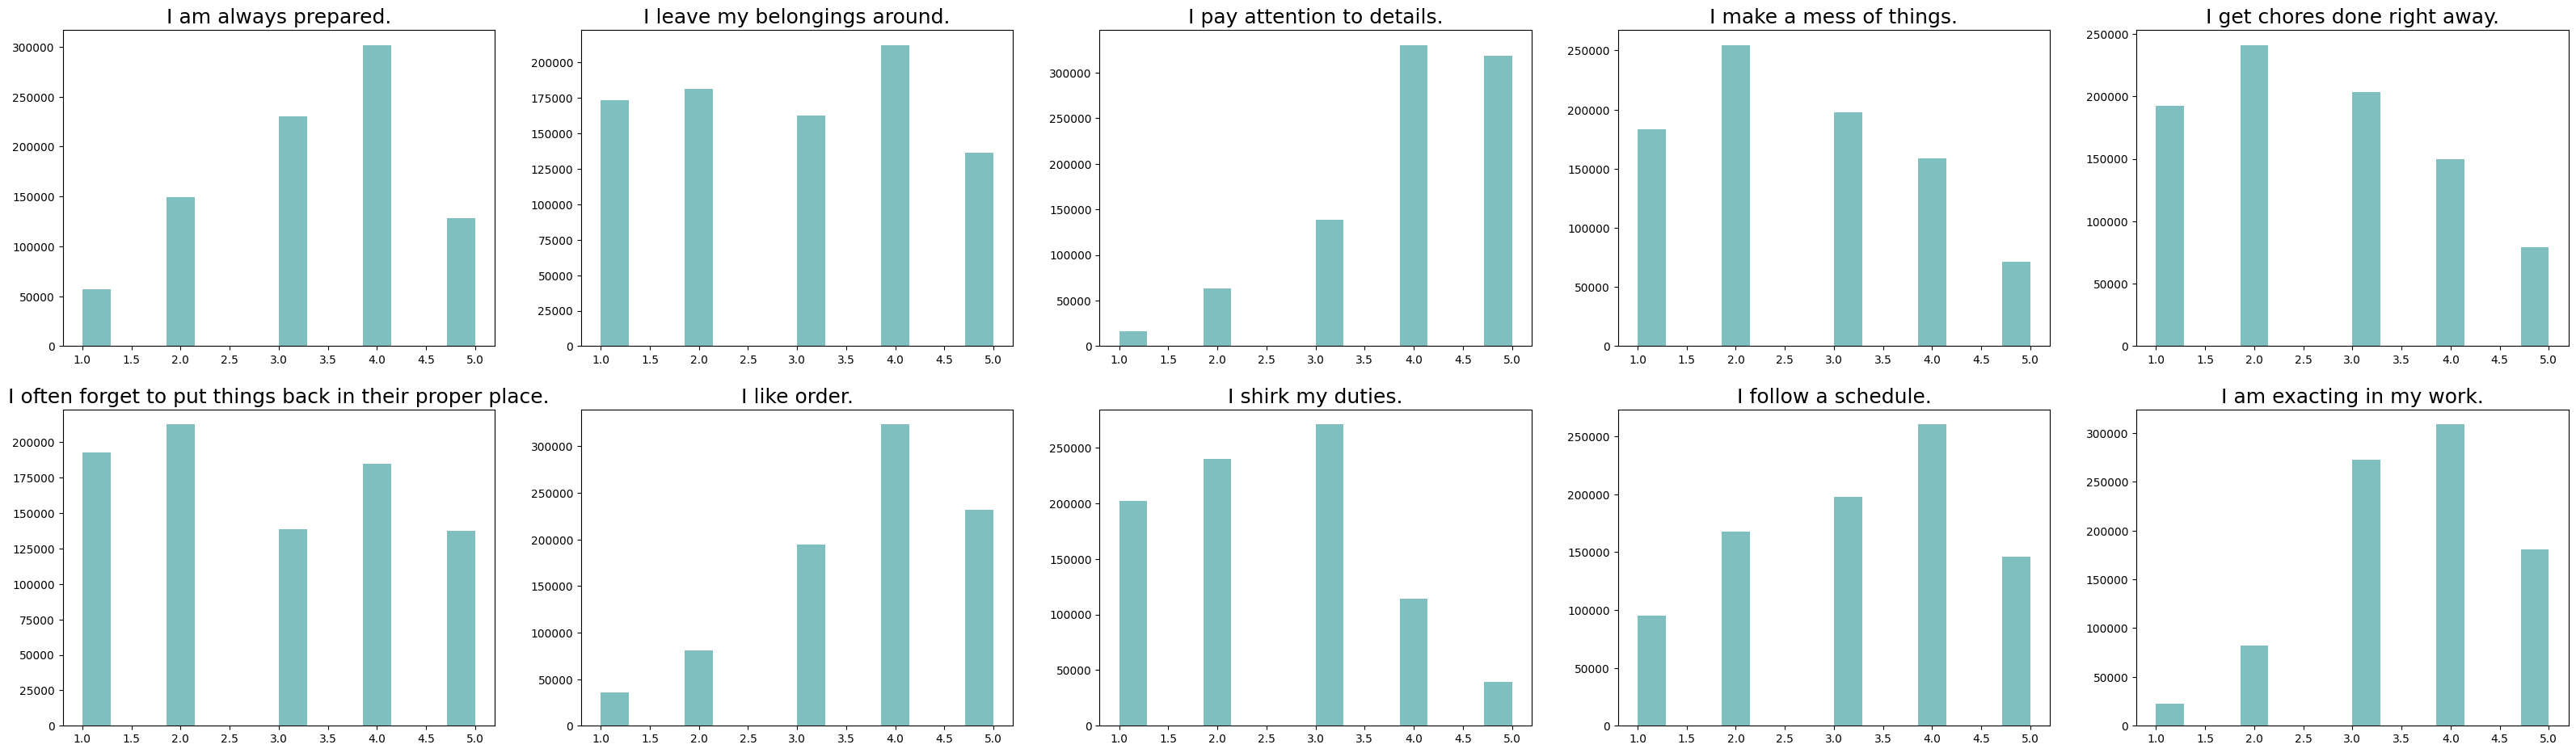

In [9]:
questionPlots(results.dropna(how='any', axis=0), 'CSN', 'teal')

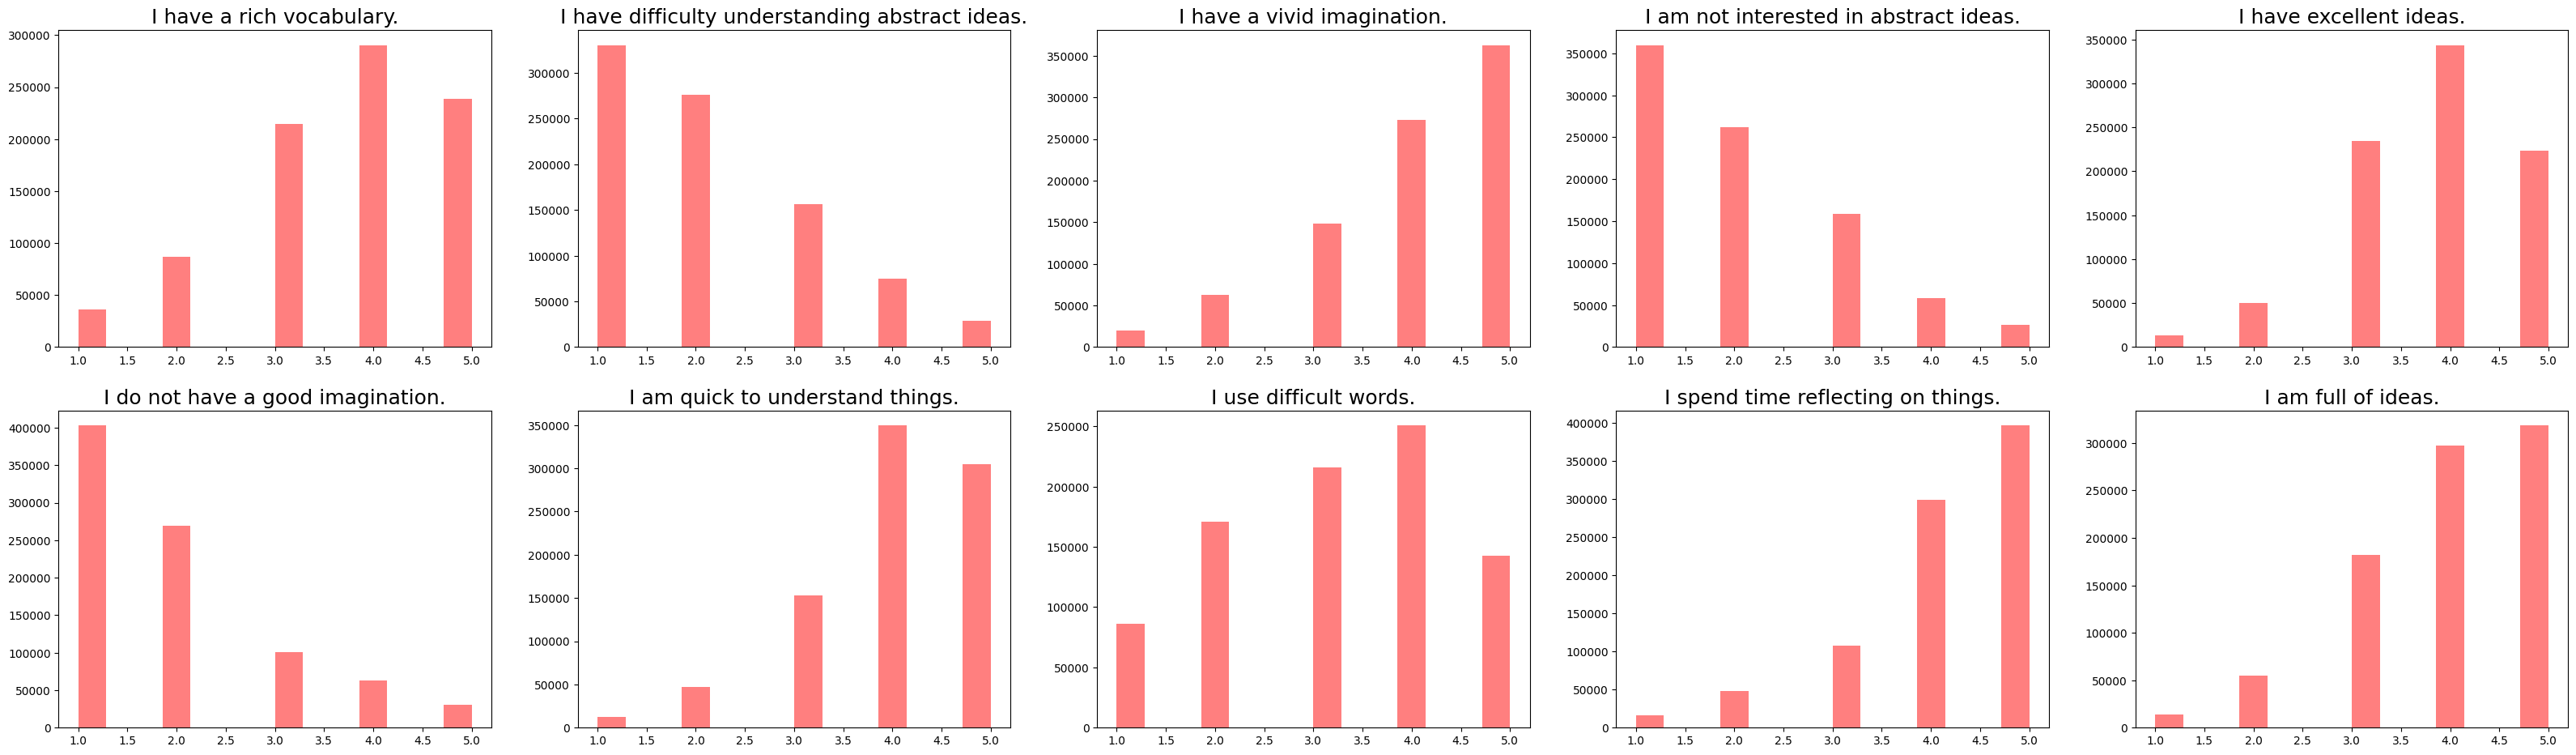

In [10]:
questionPlots(results.dropna(how='any', axis=0), 'OPN', 'red')

## Clustering Data for new Personality Categories

Goal: Create new personality groups beyond the common acronyms provided by the dominant personality with each of the 5 categories


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize values
testAnswers = results.filter(regex='EXT(?!.*_E$)|EST(?!.*_E$)|AGR(?!.*_E$)|CSN(?!.*_E$)|OPN(?!.*_E$)')
testAnswers = testAnswers.dropna(how='any', axis=0).loc[~(testAnswers == 0).any(axis=1)] # remove NAs and 0 score for test which are not available answers
# Standardize the trait data
scaler = MinMaxScaler()


(874434, 50)


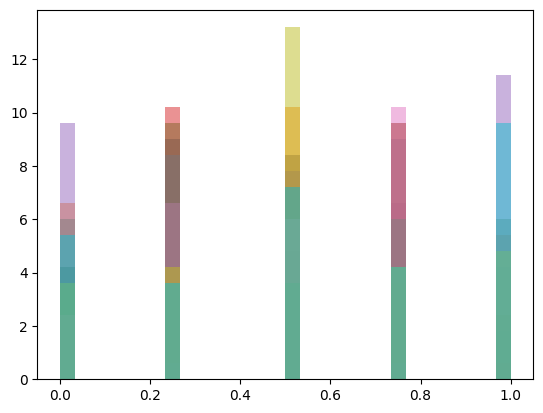

In [ ]:
trait_data_standardized = scaler.fit_transform(testAnswers) #Standardize features by removing the mean and scaling to unit variance.
print(trait_data_standardized.shape)
standardizesDF = pd.DataFrame(trait_data_standardized, columns = testAnswers.columns)
for i in range(0,10):
    plt.hist(trait_data_standardized[i], bins=30, density=True, alpha=0.5)
    

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Testing range of clusters
n_components = range(2, 10) 
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(testAnswers) for n in n_components]


In [129]:
# Calculate BIC for each model
bics = [model.bic(testAnswers) for model in models]
aics = [model.aic(testAnswers) for model in models]
cluster_labels = [model.fit_predict(testAnswers[0:10000]) for model in models]

scores = [silhouette_score(testAnswers[0:10000], labels) for labels in cluster_labels]


# Find the optimal number of clusters
optimal_BIC = n_components[bics.index(min(bics))]
optimal_AIC = n_components[aics.index(min(aics))]
optimal_Sil =  n_components[scores.index(min(scores))]


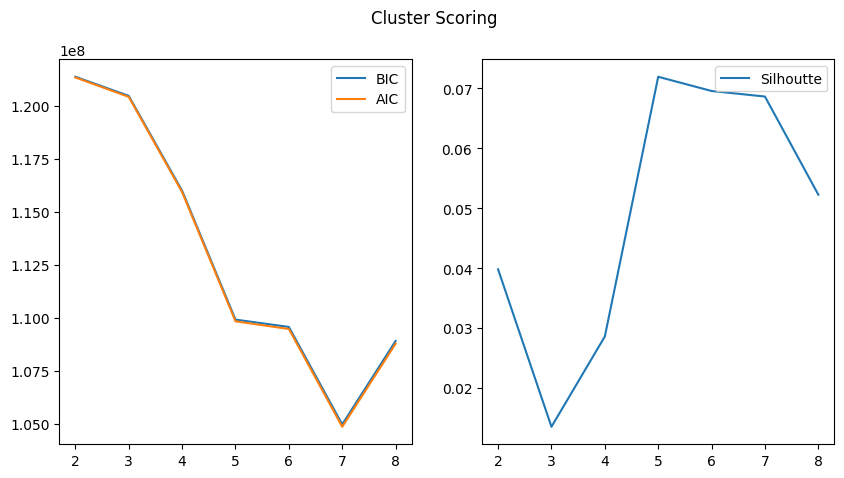

In [149]:
#print("Optimal number of clusters BIC, AIC, Sil: ", optimal_BIC, optimal_AIC, optimal_Sil)
fig, ax = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle("Cluster Scoring")
ax[0].plot(n_components, bics, label = 'BIC')
ax[0].plot(n_components, aics, label = 'AIC')
ax[0].legend()
ax[1].plot(n_components, scores, label = 'Silhoutte')
ax[1].legend()

As we can see, 5 clusters is a local minimum using AIC and BIC and the Silhoutte score falls quickly after 5 suggesting less seperation between clusters at that point.

In [131]:
models

[GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0),
 GaussianMixture(n_components=6, random_state=0),
 GaussianMixture(n_components=7, random_state=0),
 GaussianMixture(n_components=8, random_state=0)]

In [156]:
fiveClusters = models[3]
predictions = fiveClusters.predict(testAnswers)

In [157]:
predictions.shape, standardizesDF.shape

((874434,), (874434, 50))

In [158]:
# Summing up the different questions groups
col_list = list(testAnswers.columns)
#standardizesDF['clusters'] = predictions
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = testAnswers[ext].sum(axis=1)/10
data_sums['neurotic'] = testAnswers[est].sum(axis=1)/10
data_sums['agreeable'] = testAnswers[agr].sum(axis=1)/10
data_sums['conscientious'] = testAnswers[csn].sum(axis=1)/10
data_sums['open'] = testAnswers[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.074813,3.431772,3.307217,3.220338,3.366699
1,2.970930,3.664138,3.161362,3.181864,3.251285
2,3.088879,2.423923,3.213419,3.114027,3.337313
3,2.997873,2.633689,2.947978,3.030102,3.255535
4,3.057478,2.990109,3.194982,3.160122,3.236959


In [160]:
dataclusters

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.074813,3.431772,3.307217,3.220338,3.366699
1,2.970930,3.664138,3.161362,3.181864,3.251285
2,3.088879,2.423923,3.213419,3.114027,3.337313
3,2.997873,2.633689,2.947978,3.030102,3.255535
4,3.057478,2.990109,3.194982,3.160122,3.236959


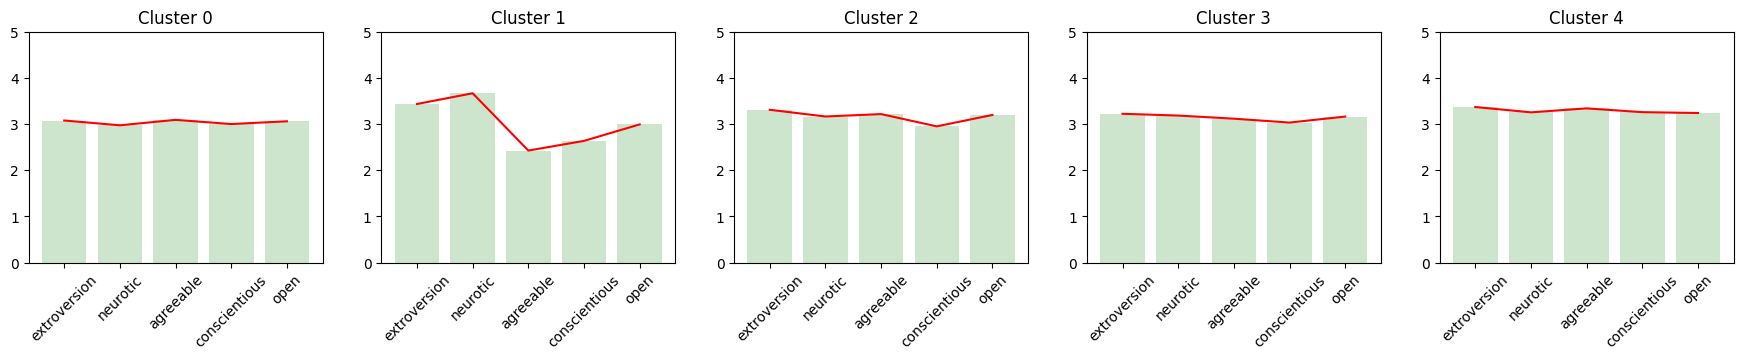

In [162]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,5);

In [163]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(testAnswers)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.474655,-1.647301,2
1,0.589495,3.116642,4
2,-0.341992,2.072356,4
3,0.751902,0.007986,3
4,-4.502234,3.166824,2


Text(0.5, 1.0, 'Personality Clusters after PCA')

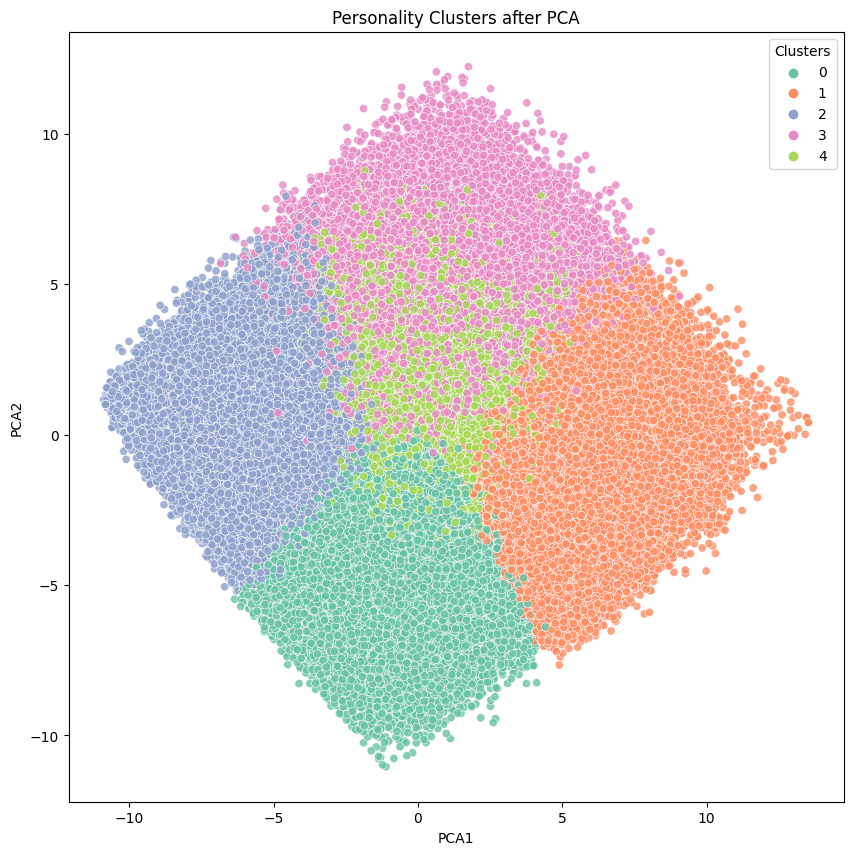

In [164]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

In [122]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(testAnswers)

# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
testAnswers['Clusters'] = predictions
testAnswers.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,2
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,3
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,3
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,0
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,2


In [123]:
# Summing up the different questions groups
col_list = list(testAnswers)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = testAnswers[ext].sum(axis=1)/10
data_sums['neurotic'] = testAnswers[est].sum(axis=1)/10
data_sums['agreeable'] = testAnswers[agr].sum(axis=1)/10
data_sums['conscientious'] = testAnswers[csn].sum(axis=1)/10
data_sums['open'] = testAnswers[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.997873,2.633689,2.947978,3.030102,3.255535
1,3.074813,3.431772,3.307217,3.220338,3.366699
2,3.088879,2.423923,3.213419,3.114027,3.337313
3,3.057478,2.990109,3.194982,3.160122,3.236959
4,2.970930,3.664138,3.161362,3.181864,3.251285
